## RL simulation analyses

In [1]:
import sys
import os
base_path = ".."
sys.path.insert(0, base_path)
os.chdir(base_path)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#### Parameter grid ####
parameters = {
    'snr': [2, 5, 10, 20],
    'n_bins': [10, 20, 30],
    'q_mean': [0],
    'q_sigma': [0.1],
    'kernel_size': [5, 10, 20],
    'kernel_sigma': [1.0, 2.0, 3.0],
    'learning_rate': [0.80, 0.85, 0.90, 0.95, 0.99],
    'temperature': [1e-5, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
    'min_temperature': [1e-5],
    'max_temperature': [1.0],
    'reduce_temperature': [True, False],
    'decay_rate': [0.001, 0.005, 0.01, 0.05]
}

# load data;
data = pd.read_pickle("./results/data.pkl")
print("Unique combinations of parameters", data.shape[0])

Unique combinations of parameters 30240


<Axes: >

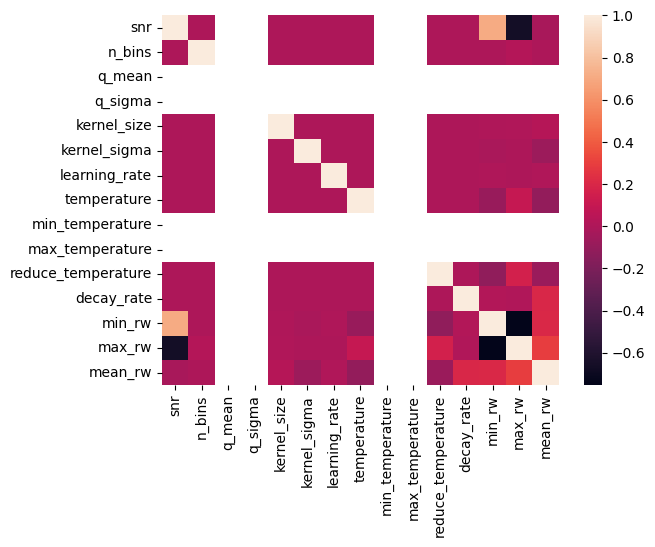

In [14]:
# look at correlations;
cols = data.columns[data.columns != "v_max"]
sns.heatmap(data.loc[:, cols].corr(), annot=False)

### Effect of reducing temperature (yes/no) on the reward (epsilon greedy w/ temperature);

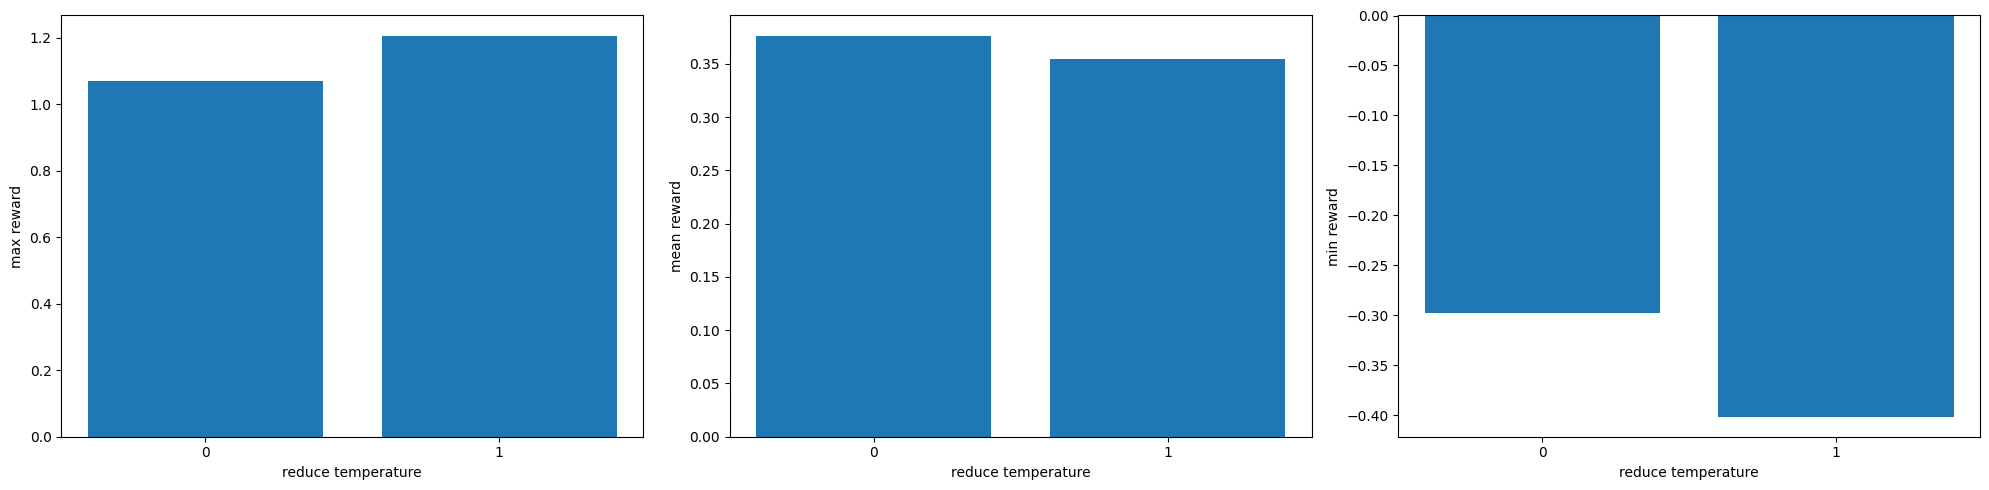

In [103]:
x = data["reduce_temperature"].unique().astype(int)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["reduce_temperature"] == x[idx], "max_rw"].mean())  
ax1.bar(x, y)
ax1.set_ylabel("max reward")
ax1.set_xlabel("reduce temperature")
ax1.set_xticks(x)

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["reduce_temperature"] == x[idx], "mean_rw"].mean())  
ax2.bar(x, y)
ax2.set_ylabel("mean reward")
ax2.set_xlabel("reduce temperature")
ax2.set_xticks(x)

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["reduce_temperature"] == x[idx], "min_rw"].mean())  
ax3.bar(x, y)
ax3.set_ylabel("min reward")
ax3.set_xlabel("reduce temperature")
ax3.set_xticks(x)

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()

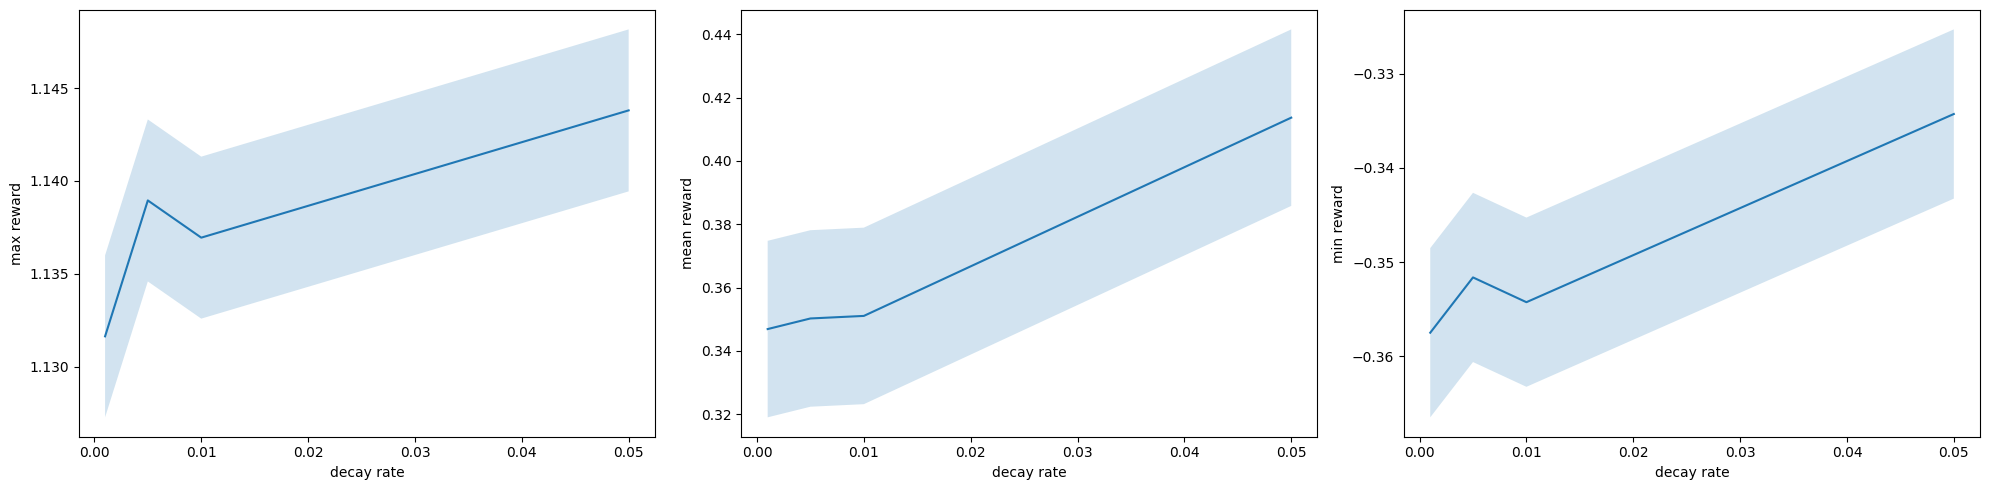

In [99]:
x = data["decay_rate"].unique().astype(float)
ticks = np.linspace(min(x), max(x), 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["decay_rate"] == x[idx], "max_rw"].mean())
ax1.plot(x, y)
ax1.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax1.set_xlabel("decay rate")
ax1.set_ylabel("max reward")

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["decay_rate"] == x[idx], "mean_rw"].mean()) 
ax2.plot(x, y)
ax2.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax2.set_xlabel("decay rate")
ax2.set_ylabel("mean reward")

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["decay_rate"] == x[idx], "min_rw"].mean()) 
ax3.plot(x, y)
ax3.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax3.set_xlabel("decay rate")
ax3.set_ylabel("min reward")

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()

### Importance of temperature for the reward

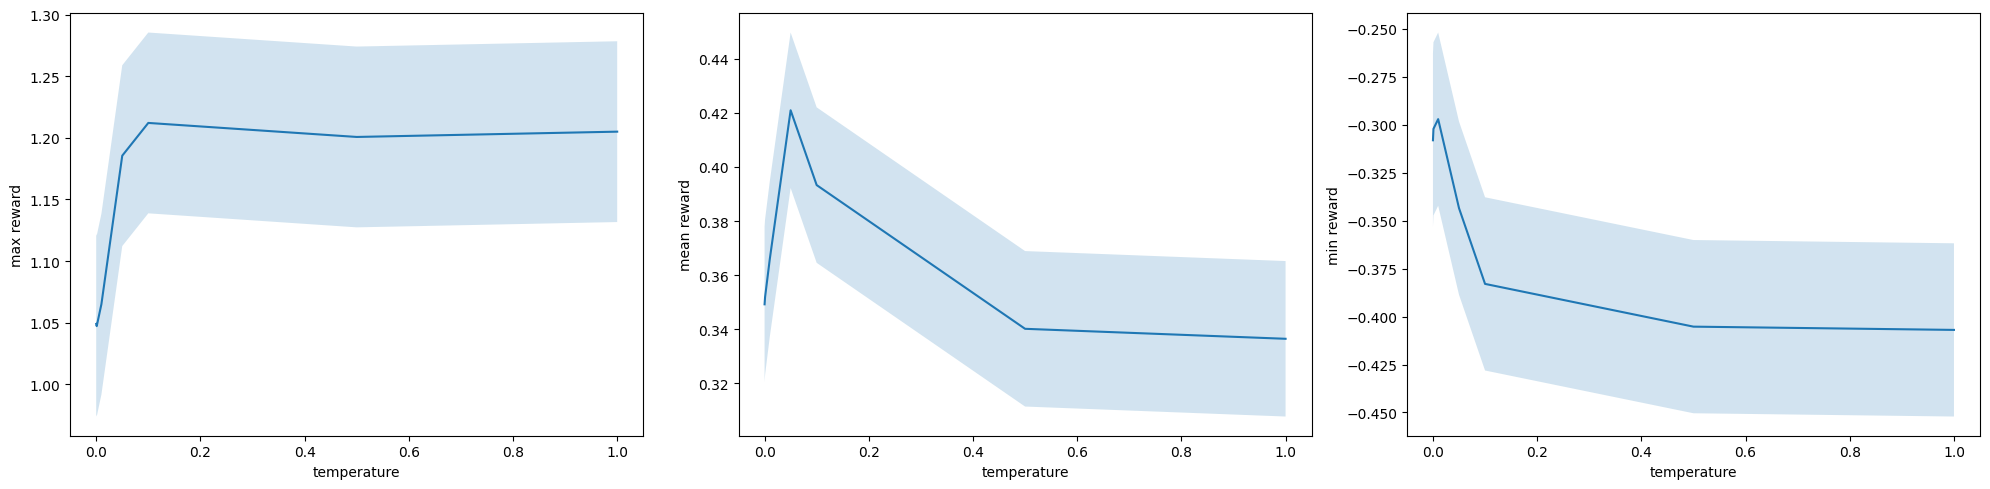

In [98]:
x = data["temperature"].unique().astype(float)
ticks = np.linspace(min(x), max(x), 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["temperature"] == x[idx], "max_rw"].mean())
ax1.plot(x, y)
ax1.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax1.set_xlabel("temperature")
ax1.set_ylabel("max reward")

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["temperature"] == x[idx], "mean_rw"].mean()) 
ax2.plot(x, y)
ax2.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax2.set_xlabel("temperature")
ax2.set_ylabel("mean reward")

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["temperature"] == x[idx], "min_rw"].mean()) 
ax3.plot(x, y)
ax3.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax3.set_xlabel("temperature")
ax3.set_ylabel("min reward")

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()

### Importance of SNR for the reward

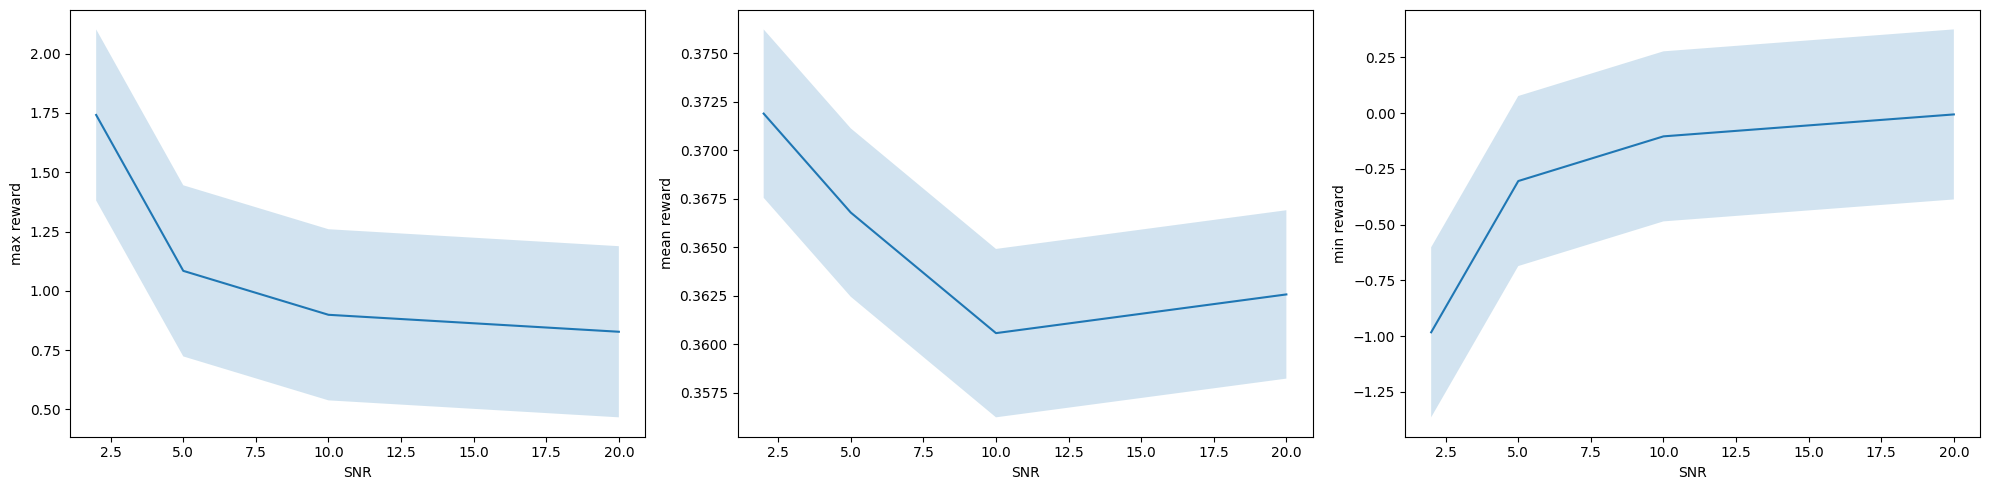

In [95]:
x = data["snr"].unique().astype(float)
ticks = np.linspace(min(x), max(x), 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["snr"] == x[idx], "max_rw"].mean())
ax1.plot(x, y)
ax1.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax1.set_xlabel("SNR")
ax1.set_ylabel("max reward")

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["snr"] == x[idx], "mean_rw"].mean()) 
ax2.plot(x, y)
ax2.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax2.set_xlabel("SNR")
ax2.set_ylabel("mean reward")

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["snr"] == x[idx], "min_rw"].mean()) 
ax3.plot(x, y)
ax3.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax3.set_xlabel("SNR")
ax3.set_ylabel("min reward")

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()

### Importance of kernel size for the reward

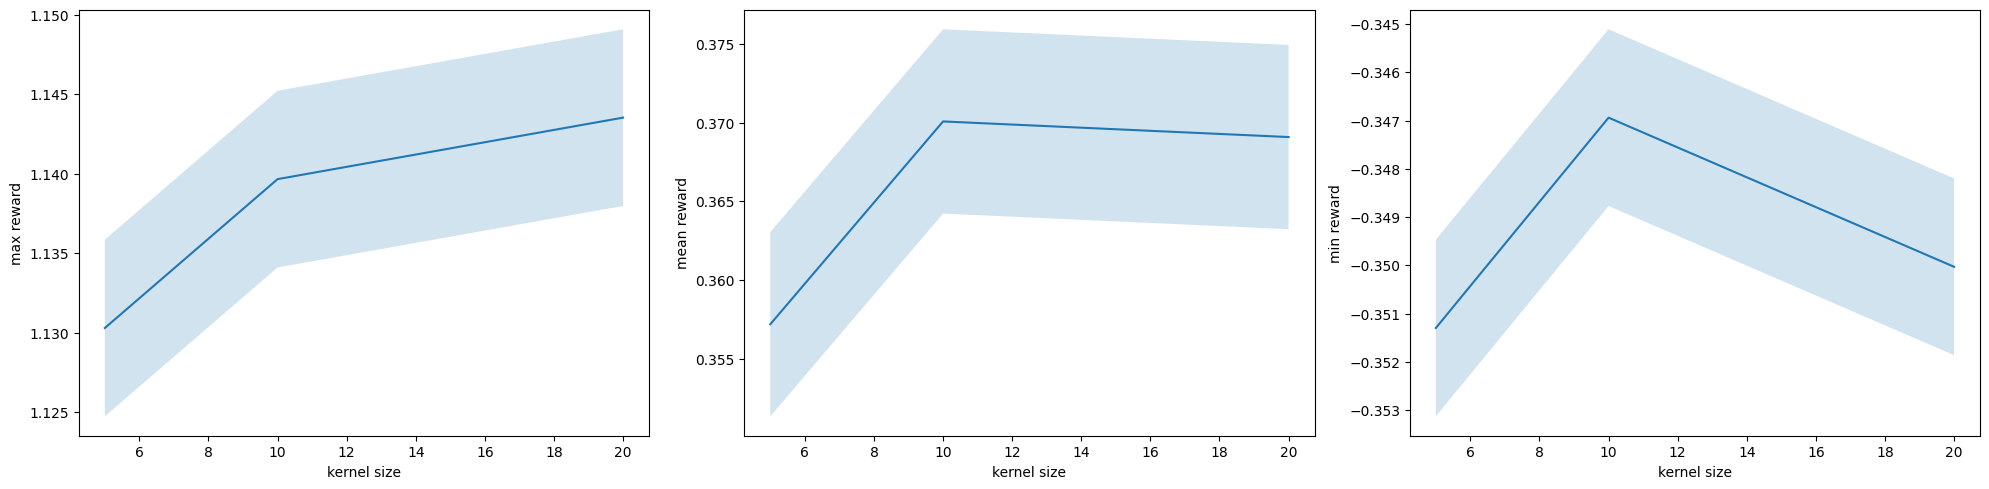

In [97]:
x = data["kernel_size"].unique().astype(float)
ticks = np.linspace(min(x), max(x), 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["kernel_size"] == x[idx], "max_rw"].mean())
ax1.plot(x, y)
ax1.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax1.set_xlabel("kernel size")
ax1.set_ylabel("max reward")

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["kernel_size"] == x[idx], "mean_rw"].mean()) 
ax2.plot(x, y)
ax2.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax2.set_xlabel("kernel size")
ax2.set_ylabel("mean reward")

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["kernel_size"] == x[idx], "min_rw"].mean()) 
ax3.plot(x, y)
ax3.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax3.set_xlabel("kernel size")
ax3.set_ylabel("min reward")

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()

### Importance of learning rate for the reward

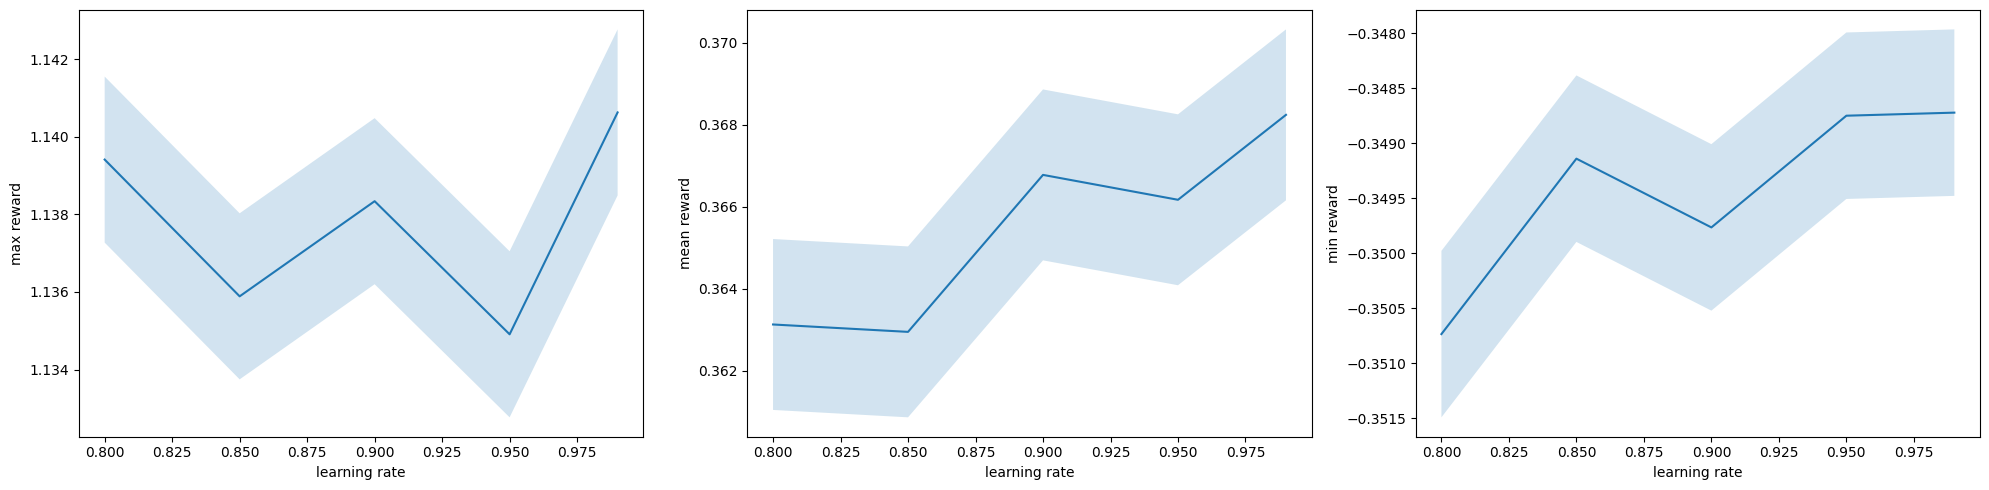

In [106]:
x = data["learning_rate"].unique().astype(float)
ticks = np.linspace(min(x), max(x), 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# plot on the first subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["learning_rate"] == x[idx], "max_rw"].mean())
ax1.plot(x, y)
ax1.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax1.set_xlabel("learning rate")
ax1.set_ylabel("max reward")

# plot on the second subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["learning_rate"] == x[idx], "mean_rw"].mean()) 
ax2.plot(x, y)
ax2.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax2.set_xlabel("learning rate")
ax2.set_ylabel("mean reward")

# plot on the third subplot;
y = []
for idx in range(len(x)):
    y.append(data.loc[data["learning_rate"] == x[idx], "min_rw"].mean()) 
ax3.plot(x, y)
ax3.fill_between(
    x, np.array(y) - np.array(np.std(y)), 
    np.array(y) + np.array(np.std(y)), 
    alpha=0.2
)
ax3.set_xlabel("learning rate")
ax3.set_ylabel("min reward")

# adjust layout to prevent overlap;
plt.tight_layout()

# display the plots;
plt.show()